# 1. 데이터 가져오기

In [2]:
df = read.csv("Project/pdata/report_0809.csv")
names(df)
head(df)

[1] "Country"                          "Year"                            
 [3] "Life.Ladder"                      "Log.GDP.per.capita"              
 [5] "Social.support"                   "Healthy.life.expectancy.at.birth"
 [7] "Freedom.to.make.life.choices"     "Generosity"                      
 [9] "Perceptions.of.corruption"        "schooling"                       
[11] "alcohol.disorders"                "suicide.rates"                   
[13] "Obesity"                          "Fertility"                       
[15] "DALYs.Mental.disorders"

Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,3.0,0.7901894,0.5896119,5.77,6.373,2.298615
Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,3.1,0.7708637,0.6046841,6.23,6.180,2.406117
Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,3.2,0.7569276,0.6264676,6.60,5.977,2.539439
Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,3.3,0.7403437,0.6460586,6.87,5.770,2.656310
Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,3.4,0.7241509,0.6583662,7.08,5.562,2.745618
Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,3.5,0.7100469,0.6780369,7.34,5.359,2.852844


# 2. 회귀적합

In [3]:
fit<-lm(Life.Ladder ~ Log.GDP.per.capita+Social.support+Healthy.life.expectancy.at.birth+ 
          Freedom.to.make.life.choices +Generosity + Perceptions.of.corruption + schooling + 
          alcohol.disorders +suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, data=df)


# 3. 회귀진단

##### 첫번째 그래프 => 1265, 1075, 1548 이상치
##### 두번째 그래프 => 1265, 1648, 1547 정규성 벗어남
##### 세번째 그래프 => 1265, 1547, 148 큰 표준화잔차 가짐

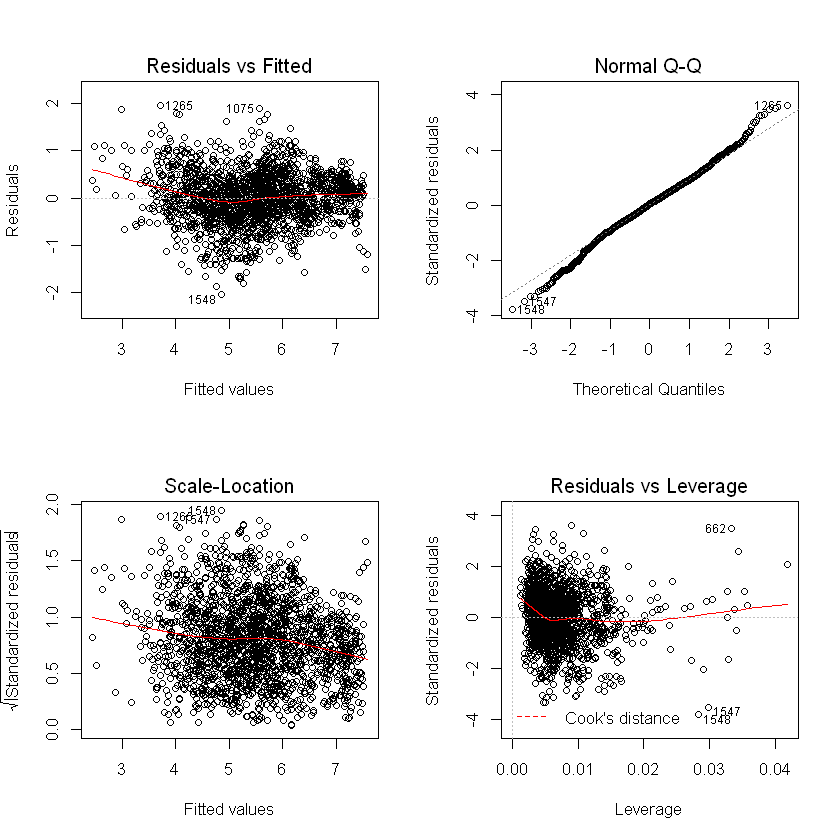

In [4]:
par(mfrow=c(2,2))
plot(fit)

## 회귀진단 - Car package 이용


In [5]:
install.packages('car')
library(car)

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
also installing the dependency 'lme4'




  There are binary versions available but the source versions are later:
     binary   source needs_compilation
lme4 1.1-26 1.1-27.1              TRUE
car  3.0-10   3.0-11             FALSE

  Binaries will be installed
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KangJaeyeon\AppData\Local\Temp\Rtmpiegg17\downloaded_packages


installing the source package 'car'

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"

### 1. 정규성

[1] 1265 1548

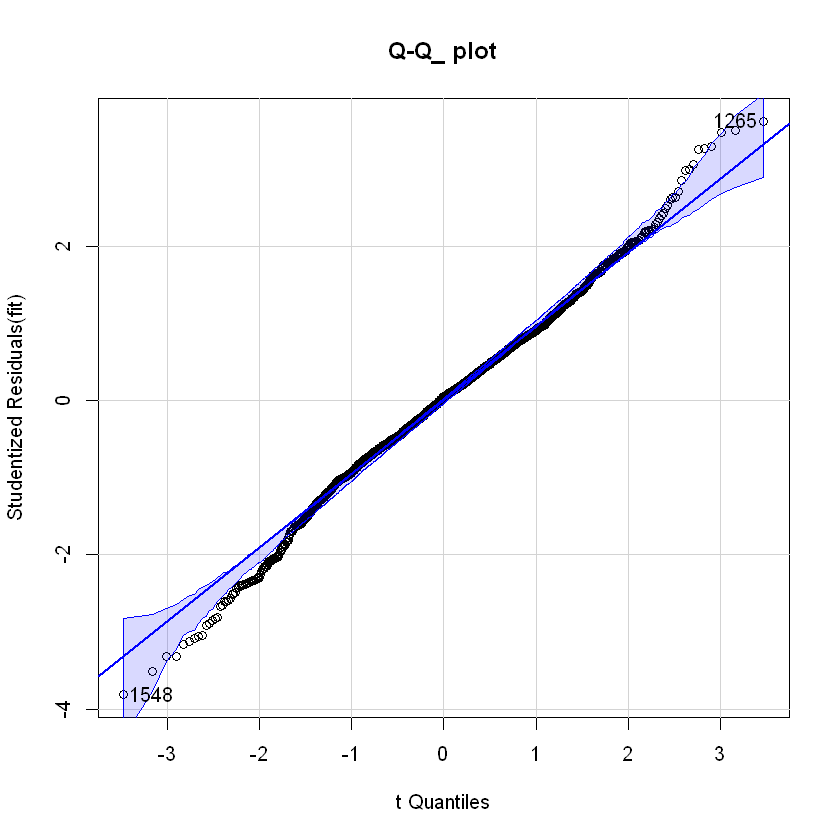

In [6]:
qqPlot(fit,main="Q-Q_ plot")  # 1265 1548

### Shapiro-Wilk test

In [7]:
shapiro.test(rstandard(fit))  # H0:정규분포 따른다. p-value = 4.982e-07 => H0 기각 . 정규분포 따르지 않음


	Shapiro-Wilk normality test

data:  rstandard(fit)
W = 0.99392, p-value = 4.982e-07


#### 실제값과 적합값 차이 크게 발생

In [8]:
# 실제값
df["1265",]  # Life Ladder : 5.671
df["1548",]  # Life Ladder : 2.817

# 적합값
fitted(fit)["1265"]  # 3.715534
fitted(fit)["1548"]  # 4.854114 

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1265,Pakistan,2007,5.671,8.277,0.479,55,0.396,0.089,0.794,4.4,0.9744702,0.5791493,5.07,4.211,2.603388


,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1548,South Sudan,2017,2.817,10.648,0.557,51,0.456,-0.106,0.761,4.8,2.144866,0.6115541,1.56,4.775,1.787956


1265 
3.719593

1548 
4.851455

### 잔차와 표준화잔차 확인

In [9]:
# 잔차
residuals(fit)["1265"]
residuals(fit)["1548"]

# 표준화잔차
rstudent(fit)["1265"]
rstudent(fit)["1548"]

1265 
1.951407

1548 
-2.034455

1265 
3.620017

1548 
-3.812682

### 오차 분포 확인

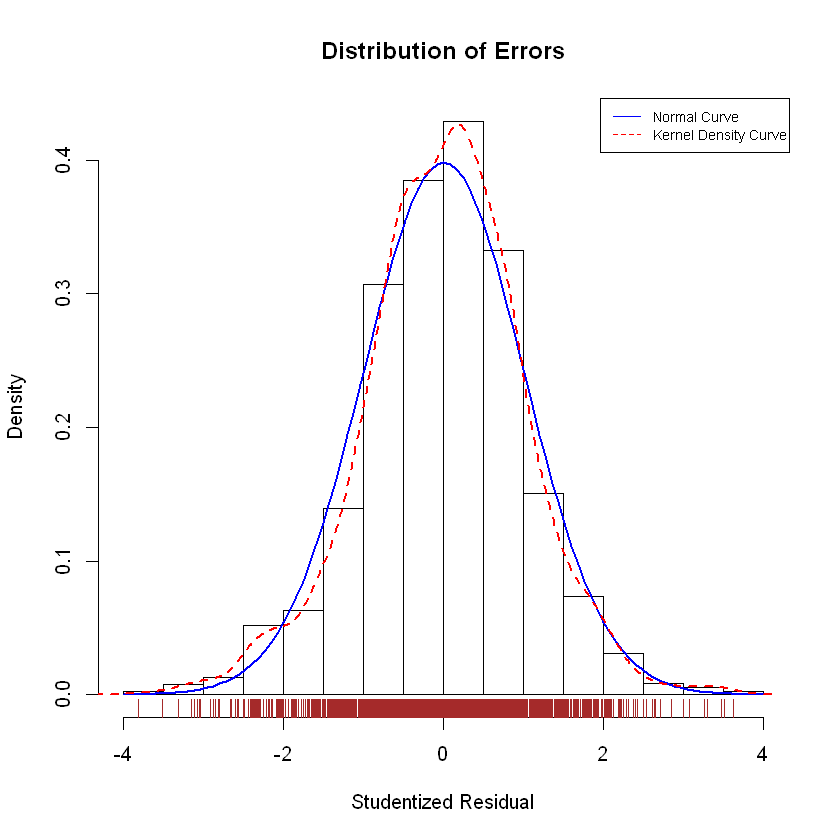

In [10]:
residplot <- function(fit, nbreaks) {
  z <- rstudent(fit)
  hist(z, breaks=nbreaks, freq=FALSE,xlab="Studentized Residual",
       main="Distribution of Errors")
  rug(jitter(z), col="brown")
  curve(dnorm(x, mean=mean(z), sd=sd(z)),add=TRUE, col="blue", lwd=2)
  lines(density(z)$x, density(z)$y,col="red", lwd=2, lty=2)
  legend("topright",legend = c( "Normal Curve", "Kernel Density Curve"),
         lty=1:2, col=c("blue","red"), cex=.7)
}
residplot(fit, 20)

### 2. 독립성

In [11]:
install.packages('lmtest')
library(lmtest) 
dwtest(fit)   # DW 값이 2에 가까워야 함. DW = 0.61751 로 자기상관성이 있음 -> 독립성 만족하지 않음

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KangJaeyeon\AppData\Local\Temp\Rtmpiegg17\downloaded_packages


Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




	Durbin-Watson test

data:  fit
DW = 0.61751, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


### 3. 선형성

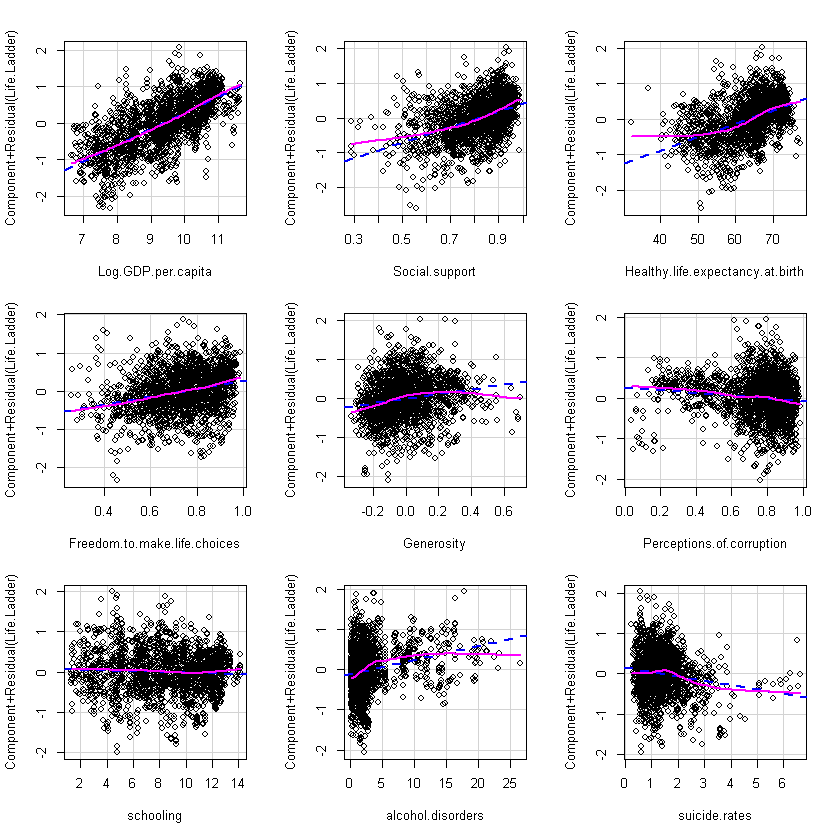

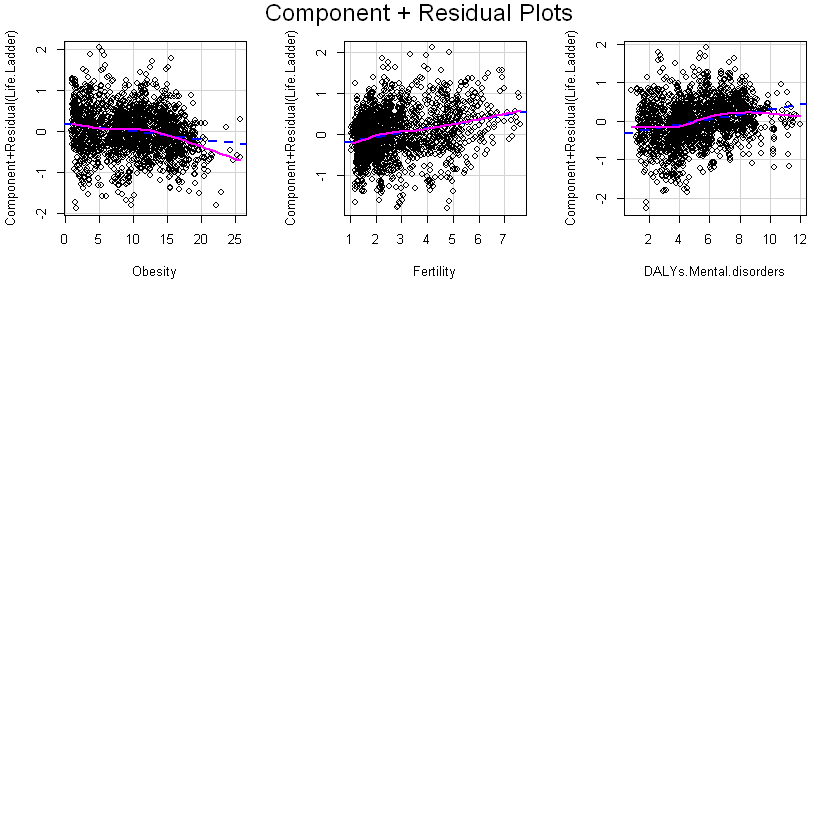

In [12]:
# partial residual plot
crPlots(fit)  # 선형성 만족하는 것으로 보임 (내 생각.. )

### 4. 등분산성

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 62.16525, Df = 1, p = 3.1581e-15


Suggested power transformation:  1.65852 

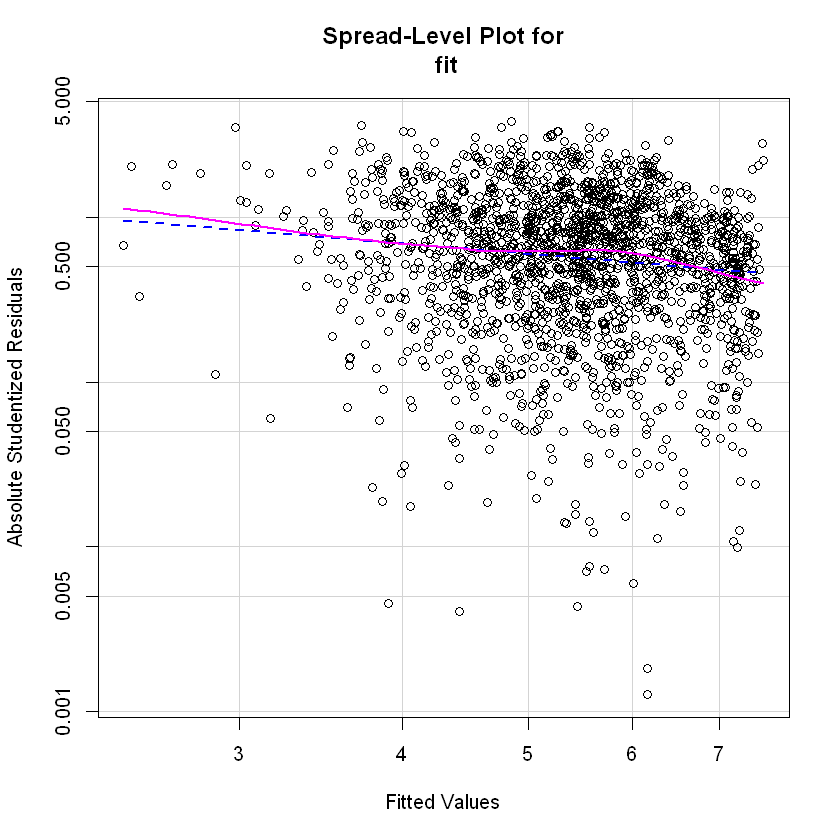

In [13]:
par(mfrow=c(1,1))
ncvTest(fit)          # p = 3.1581e-15 로 유의 -> 등분산성의 가정 위배- > nonhorizontal line 보여줌. 

spreadLevelPlot(fit) 
# Suggested power transformation 값은 일정하지 않은 오차의 분산을 안정화시키기 위해 필요한 power transforamtion 값 제시 : 1.65852 
# ex) 0.5의 경우 Y대신 sqrt(Y) 사용

## 선형모형 가정에 대한 전반적 검증

In [14]:
install.packages('gvlma')
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)

# Global stat의 p값이 0.05 이하이므로 어느 부분이 위배되었는지 평가해야함. 

Installing package into 'C:/Users/KangJaeyeon/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\KangJaeyeon\AppData\Local\Temp\Rtmpiegg17\downloaded_packages

Call:
lm(formula = Life.Ladder ~ Log.GDP.per.capita + Social.support + 
    Healthy.life.expectancy.at.birth + Freedom.to.make.life.choices + 
    Generosity + Perceptions.of.corruption + schooling + alcohol.disorders + 
    suicide.rates + Obesity + Fertility + DALYs.Mental.disorders, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.03446 -0.32692  0.02628  0.34600  1.95141 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -3.706453   0.364035 -10.182  < 2e-16 ***
Log.GDP.per.capita                0.439392   0.026860  16.358  < 2e-16 ***
Social.support                    2.249297   0.156626  14.361  < 2e-16 ***
Healthy.life.expectancy.at.birth  0.037755   0.004647   8.125 7.99e-16 ***
Freedom.to.make.life.choices    

## 이상치 테스트
##### 비정상적으로 큰 양수 또는 음수의 잔차를 가짐. 잔차가 양성인 경우 모형이 반응변수를 저평가한 것, 음성인 경우 과대평가한 것. 표준잔차의 2배 이상으로 크거나 -2배 이상으로 작은 값은 이상치.

In [17]:
outlierTest(fit)  # 1548는 이상치
df["1548",]

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
      rstudent unadjusted p-value Bonferroni p
1548 -3.812682         0.00014189      0.26917

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
1548,South Sudan,2017,2.817,10.648,0.557,51,0.456,-0.106,0.761,4.8,2.144866,0.6115541,1.56,4.775,1.787956


## 큰지레점(High leverage points)

##### 예측변수의 이상치. 평균 hat 값의 2~3배 이상 큰 수치를 가지는 관측치는 검사해 봐야 함. 

integer(0)

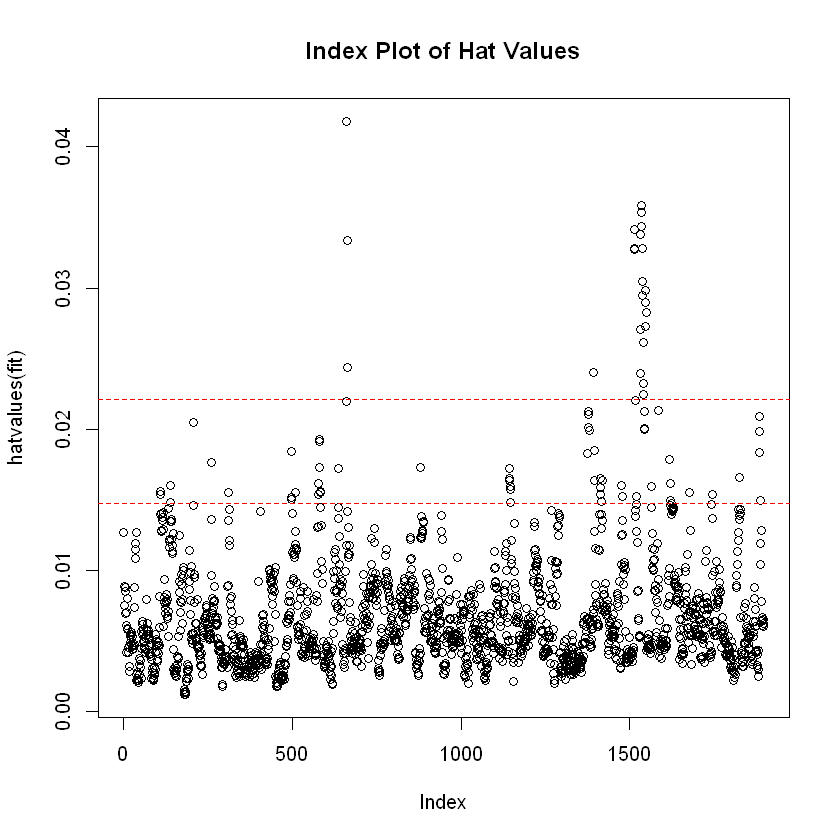

In [20]:

p=length(coefficients(fit))
n=length(fitted(fit))
hatmean = (p+1)/n  # 지레값 평균 

hat.plot=function(fit){
  p=length(coefficients(fit))
  n=length(fitted(fit))
  plot(hatvalues(fit), main="Index Plot of Hat Values")
  abline(h=c(2,3)*hatmean, col="red", lty=2)
  identify(1:n, hatvalues(fit), names(hatvalues(fit)))
}
hat.plot(fit)


In [22]:
# 3배 이상인 개체 -> 왜 영향력이 있는지 데이터를 탐색해봐야 함. 그 후 제거할지 살릴지 판단
df[which(hatvalues(fit)>3*hatmean),]

,Country,Year,Life.Ladder,Log.GDP.per.capita,Social.support,Healthy.life.expectancy.at.birth,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption,schooling,alcohol.disorders,suicide.rates,Obesity,Fertility,DALYs.Mental.disorders
661,Haiti,2010,3.766,7.384,0.554,32.30,0.373,0.216,0.848,4.7,3.637725,0.2340628,1.52,3.427,0.7972673
662,Haiti,2011,4.845,7.423,0.567,36.86,0.413,0.243,0.682,4.8,3.641028,0.8212186,5.41,3.356,2.7332293
663,Haiti,2012,4.413,7.437,0.749,41.42,0.482,0.289,0.717,4.9,3.642979,0.8550420,5.73,3.288,2.8991317
1393,Russia,2006,4.964,9.991,0.895,58.68,0.643,-0.307,0.935,11.4,26.533302,3.0502249,15.01,1.398,3.1022577
1512,Somalia,2014,5.528,10.478,0.611,49.60,0.874,-0.081,0.456,12.2,2.367547,0.5590022,2.01,6.462,2.1072521
1513,Somalia,2015,5.354,10.478,0.599,50.10,0.968,-0.081,0.410,12.2,2.361837,0.5740747,2.09,6.363,2.1850200
1514,Somalia,2016,4.668,10.478,0.594,50.00,0.917,-0.081,0.441,12.2,2.350078,0.5852021,2.14,6.265,2.2437860
1530,South Korea,2006,5.332,10.310,0.775,70.20,0.715,-0.052,0.799,11.4,1.724703,5.6117211,5.54,1.165,7.1764591
1531,South Korea,2007,5.767,10.361,0.827,70.50,0.656,-0.059,0.803,11.5,1.613024,5.9137813,5.49,1.170,7.2224205
1532,South Korea,2008,5.390,10.383,0.754,70.80,0.524,-0.102,0.771,11.6,1.548179,6.2377137,5.43,1.181,7.2654901


## 영향 관측치 (influential observation)
##### 관측치를 제거함으로써 모형이 극적으로 달라지게 되는 경우가 있는데 이러한 관측치가 영향관측치 .Cook’s distance 값이 4/(n-k-1)보다 큰 관측치는 영향관측치이다. 이때 n은 샘플 크기이며 k는 예측변수의 수.

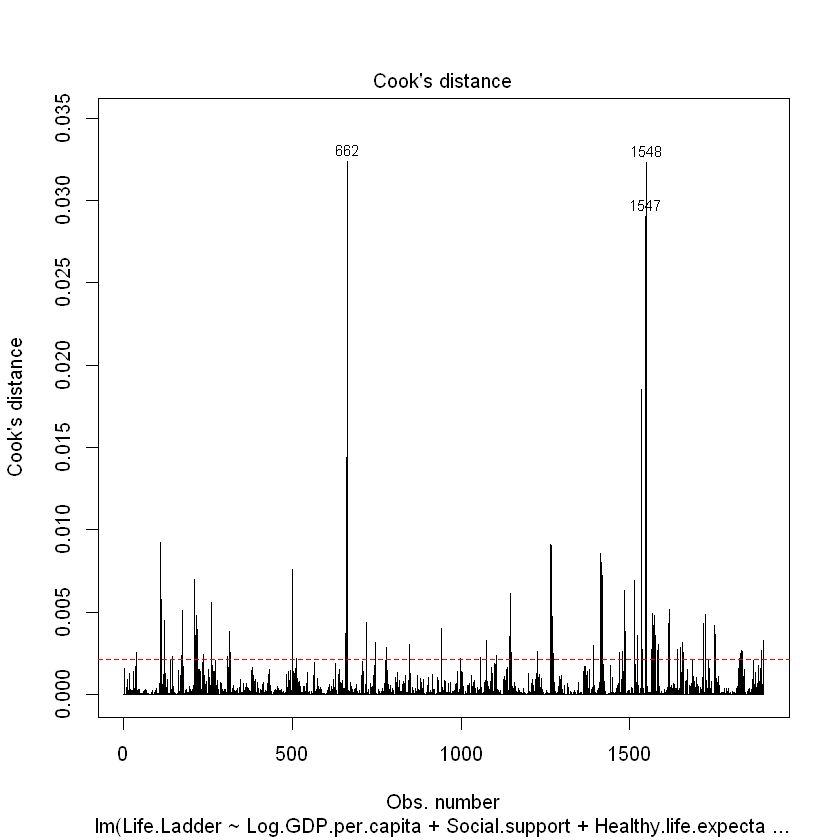

In [24]:
par(mfrow=c(1,1))
cutoff <- 4/(nrow(df)-length(fit$coefficients)-1)
plot(fit, which=4, cook.levels=cutoff)
abline(h=cutoff, lty=2, col="red")

# 빨간선 위 데이터들은 영향 관측치

## Added-Variable plot

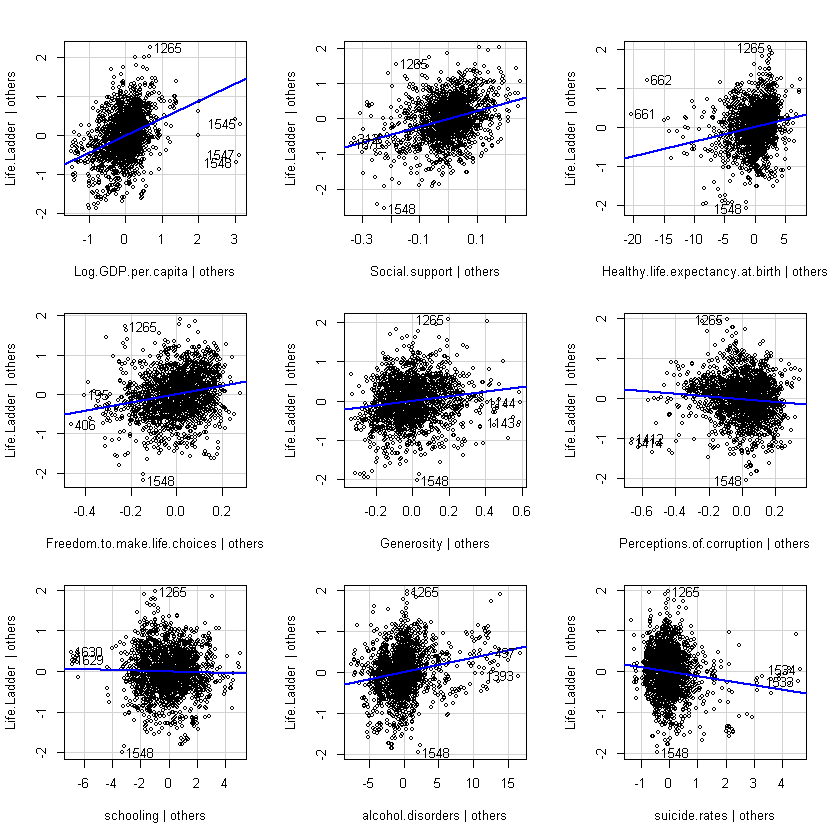

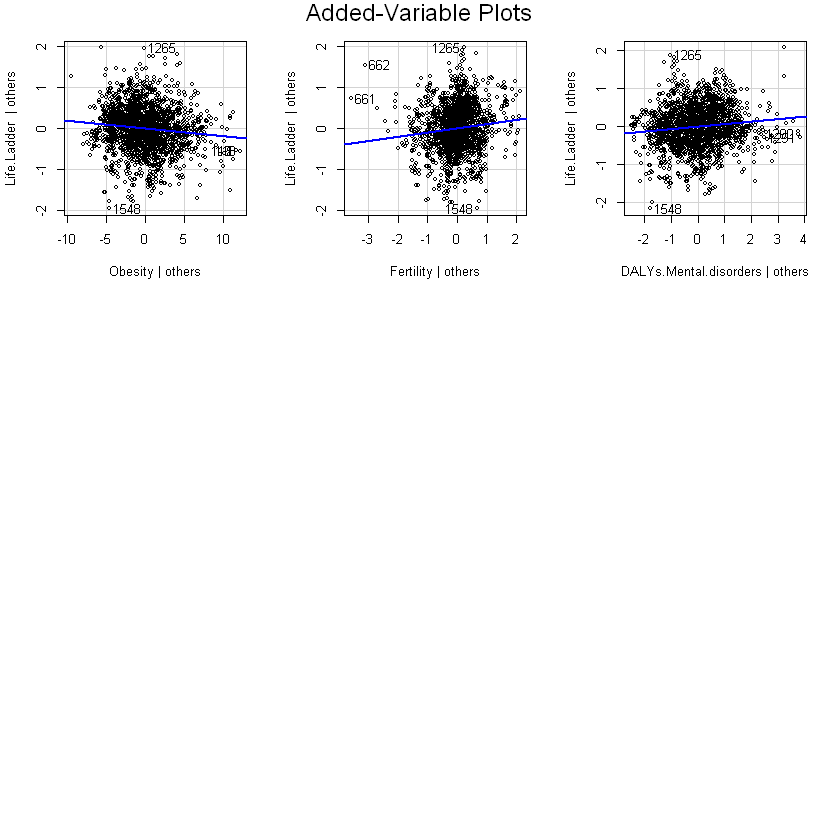

In [27]:
car::avPlots(fit,ask=FALSE)

# 플롯에 나타나는 점들의 기울기는 해당 예측변수에 대한 회귀계수. 계수의 크기를 예측하는 데 중요한 역할을 하는 데이터 점 제시. 
# 한 관측치의 점이 없어질 경우 회귀선에 어떤 영향을 미칠지 생각해볼 수 있음

## 이상치, 큰지레점, 영향관측치 한 번에 파악하기

,StudRes,Hat,CookD
661,2.0720931,0.041804631,0.0143842415
662,3.5027639,0.033369556,0.0323875648
1265,3.6200166,0.009029061,0.0091259501
1533,0.4627357,0.035834854,0.0006124322
1548,-3.8126818,0.028261930,0.0322894852


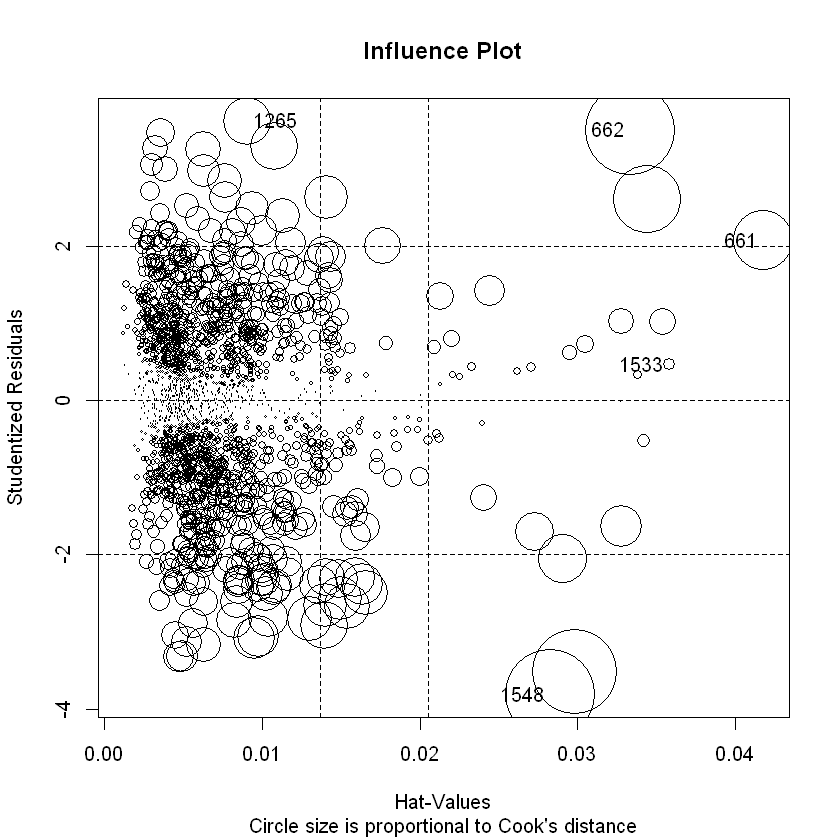

In [28]:
par(mfrow=c(1,1))
car :: influencePlot(fit, main='Influence Plot', 
                     sub = "Circle size is proportional to Cook's distance")
# y축이 표준화잔차이므로 +2배, -2배이상 벌어져 있는 점들이 이상치. 
# x축이 hat값이므로 평균 hat값의 2배이상 되는 개체들이 높은 지레점 -> 이 개체들은 영향력이 있는지 탐지되어야 함
# 원의 크기가 Cook's D 값은 반영 하므로 원의 크기가 큰 개체들이 영향 관측치